## 1. Importações de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display, HTML
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression

## 2. Importações dos dados

In [2]:
url = "https://raw.githubusercontent.com/manueladinizc/LH_CD_MANUELA/main/teste_indicium_precificacao.csv"

dataset = pd.read_csv(url, sep=',')

In [3]:
df = dataset.copy()
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Dicionário dos dados

```
id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
nome - Representa o nome do anúncio
host_id - Representa o id do usuário que hospedou o anúncio
host_name – Contém o nome do usuário que hospedou o anúncio
bairro_group - Contém o nome do bairro onde o anúncio está localizado
bairro - Contém o nome da área onde o anúncio está localizado
latitude - Contém a latitude do local
longitude - Contém a longitude do local
room_type – Contém o tipo de espaço de cada anúncio
price - Contém o preço por noite em dólares listado pelo anfitrião
minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
numero_de_reviews - Contém o número de comentários dados a cada listagem
ultima_review - Contém a data da última revisão dada à listagem
reviews_por_mes - Contém o número de avaliações fornecidas por mês
calculado_host_listings_count - Contém a quantidade de listagem por host
disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva
```




In [4]:
print("DATA INFOS")
print("===========================")
print(df.info(show_counts=True))

DATA INFOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  3884

In [5]:
print("Data shape: ", df.shape)
print("===========================")
print("Missing Values:")
print(df.isnull().sum())
print("===========================")
print("Number of duplicates lines:", df.duplicated().sum())

Data shape:  (48894, 16)
Missing Values:
id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64
Number of duplicates lines: 0


In [6]:
unique_number=[]
for i in df.columns:
    x=df[i].value_counts().count()
    unique_number.append(x)
unique = pd.DataFrame(unique_number, columns=['Unique values per attribute'], index=df.columns)
unique

,Unique values per attribute
id,48894
nome,47904
host_id,37457
host_name,11452
bairro_group,5
bairro,221
latitude,19048
longitude,14718
room_type,3
price,674


In [7]:
# Visão geral dos valores únicos de atributos:
col1 = ['bairro_group', 'room_type']
for col in df.columns:
    if col in col1:
        print(f"Valores únicos da coluna {col}: {df[col].unique()}\n")

Valores únicos da coluna bairro_group: ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']

Valores únicos da coluna room_type: ['Entire home/apt' 'Private room' 'Shared room']



## 3.Análise exploratória de dados

### 3.1.1. Questão 1

In [8]:
# Estatísticas descritivas
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
#definir uma cor para os gráficos
aqua = '#5eccbf'

In [10]:
attributes = ['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
              'calculado_host_listings_count', 'disponibilidade_365']

def plot_histogram_and_boxplot(df, attr):
    title_font = {'color': 'darkblue', 'weight': 'bold', 'size': 15}
    axis_font = {'weight': 'bold', 'size': 13}

    for attr in attr:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), dpi=80)

        sns.histplot(df[attr], kde=True, bins=20, edgecolor='k', linewidth=1, ax=axes[0], color=aqua)
        axes[0].set_title(attr + ' Histogram', fontdict=title_font)
        axes[0].set_xlabel(attr, fontdict=axis_font)
        axes[0].set_ylabel('Frequência', fontdict=axis_font)

        sns.boxplot(x=df[attr], color=aqua, ax=axes[1])
        axes[1].set_title(attr + ' Boxplot', fontdict=title_font)
        axes[1].set_xlabel(attr, fontdict=axis_font)

        plt.tight_layout()
        plt.show()

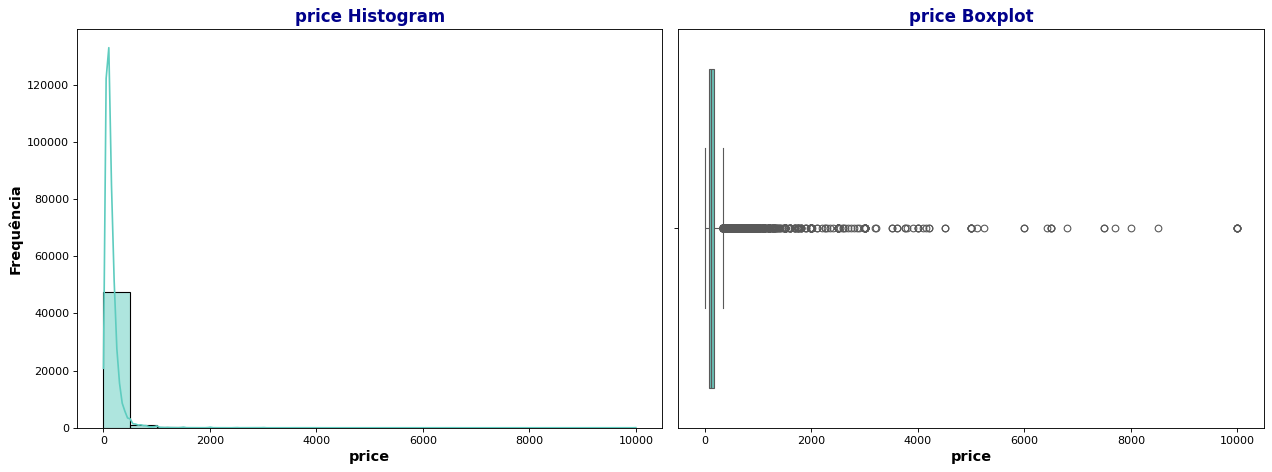

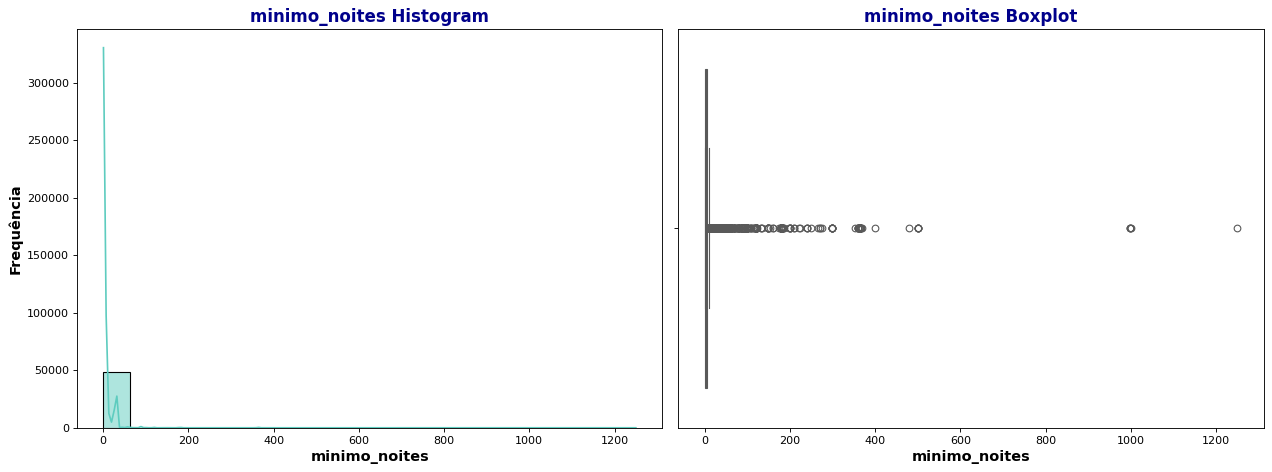

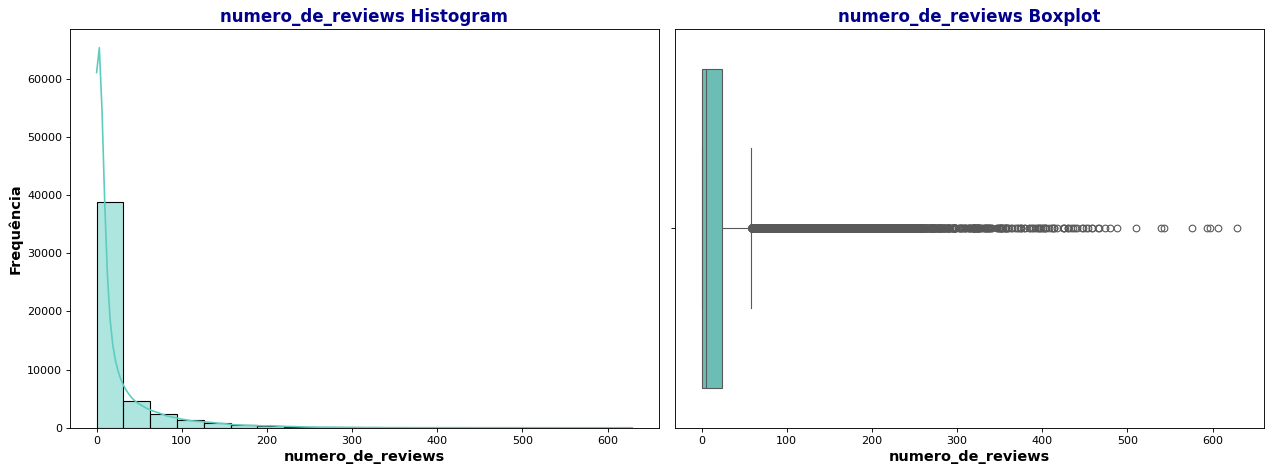

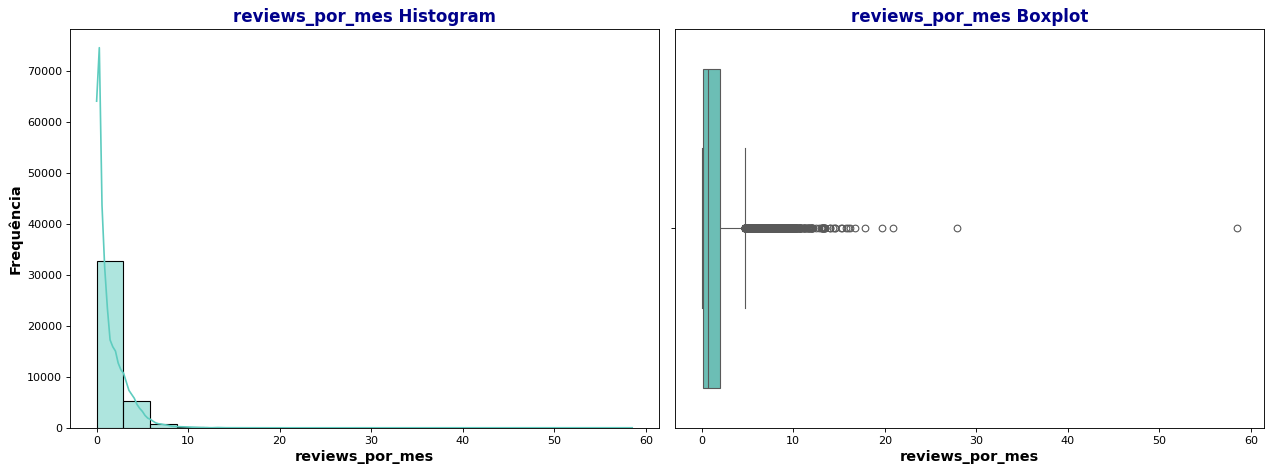

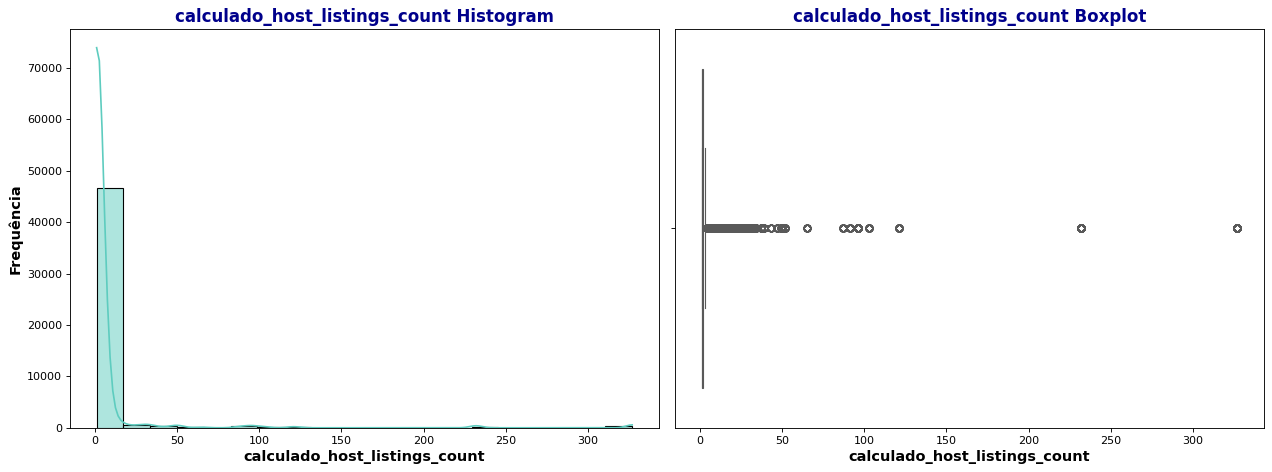

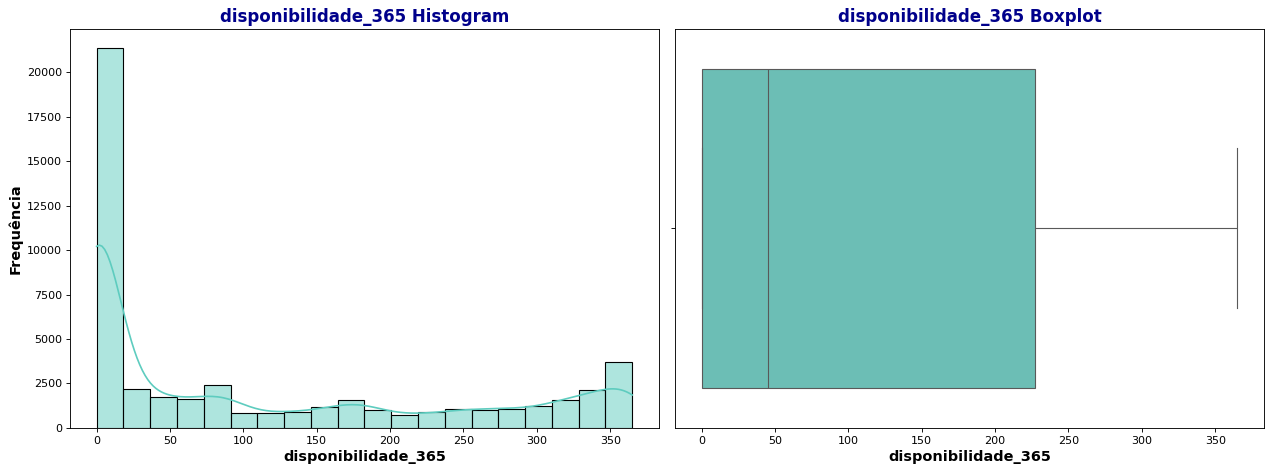

In [11]:
plot_histogram_and_boxplot(df, attributes)

Observa-se uma quantidade significativa de possíveis valores outliers. Para simplificar a compreensão dos dados, será aplicado o método IQR (Interquartile Range) para removê-los.

In [12]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

In [13]:
# columns_to_remove_outliers = ['price', 'minimo_noites', 'calculado_host_listings_count']

# Aplicar a função remove_outliers_iqr a cada atributo na lista
for column in attributes:
    df = remove_outliers_iqr(df, column)

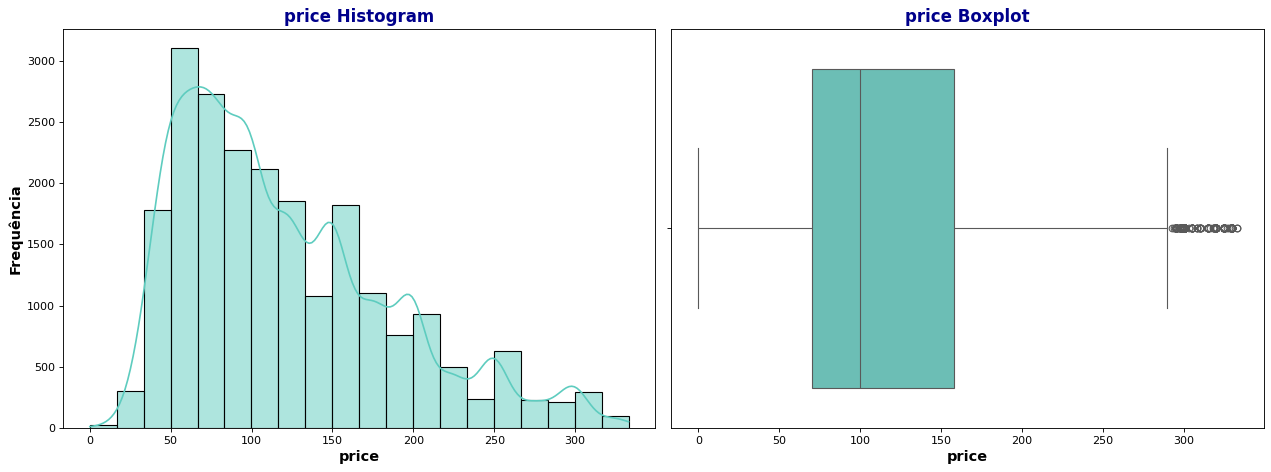

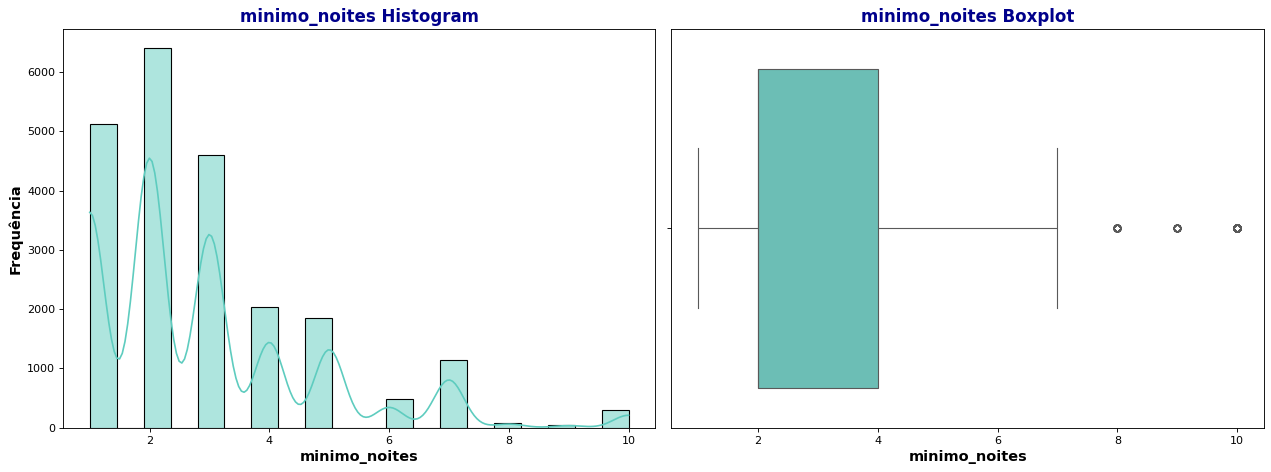

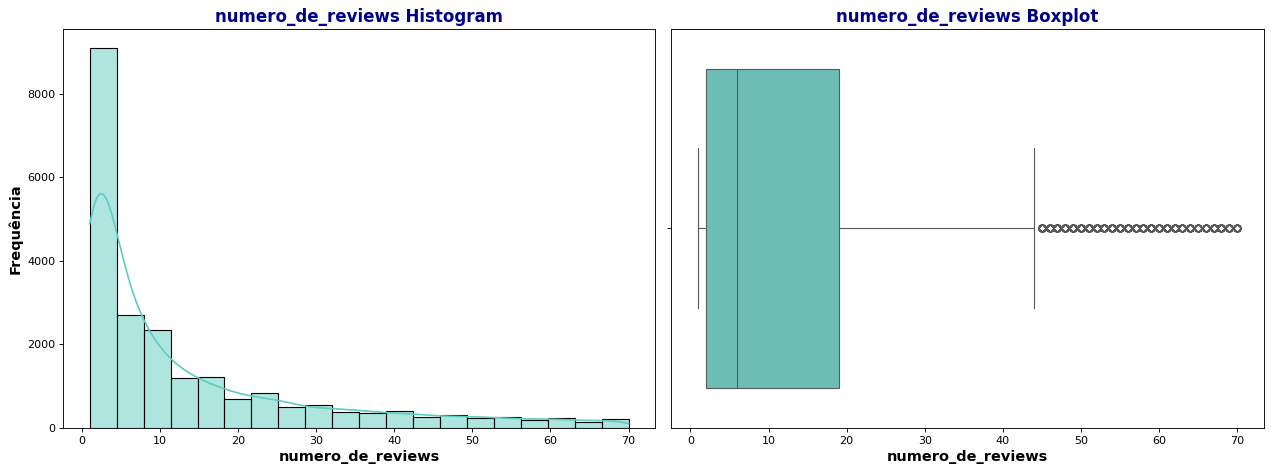

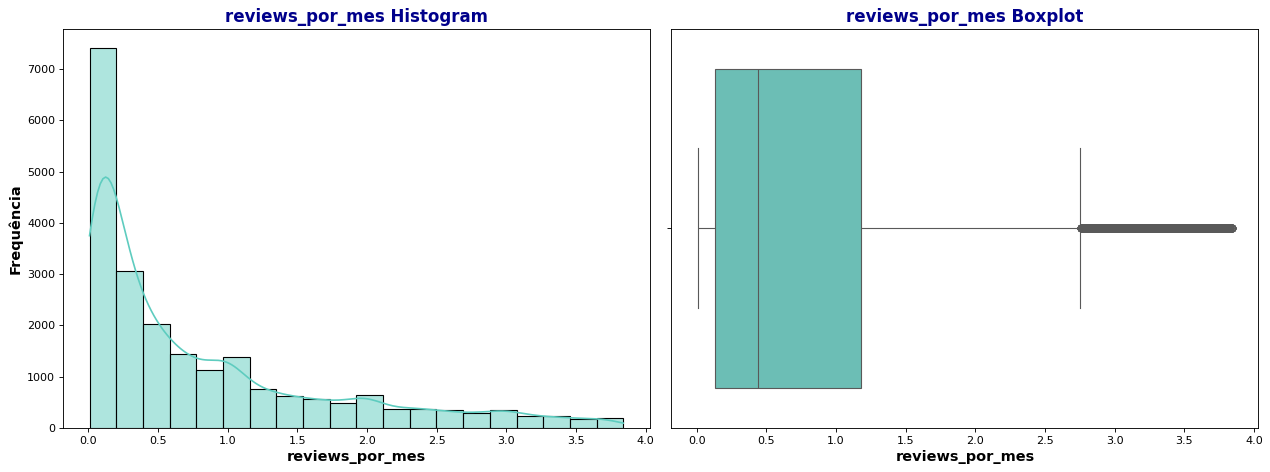

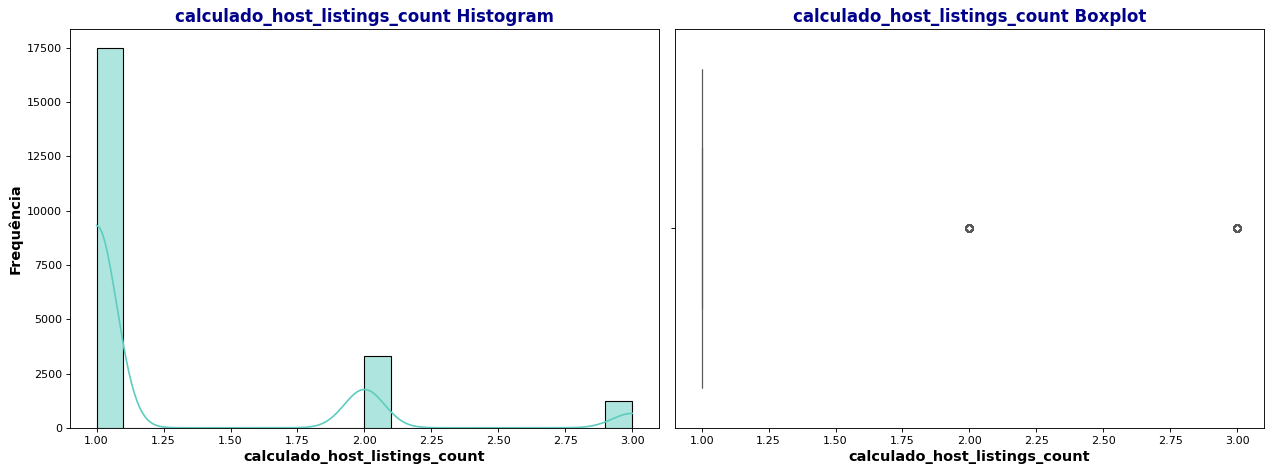

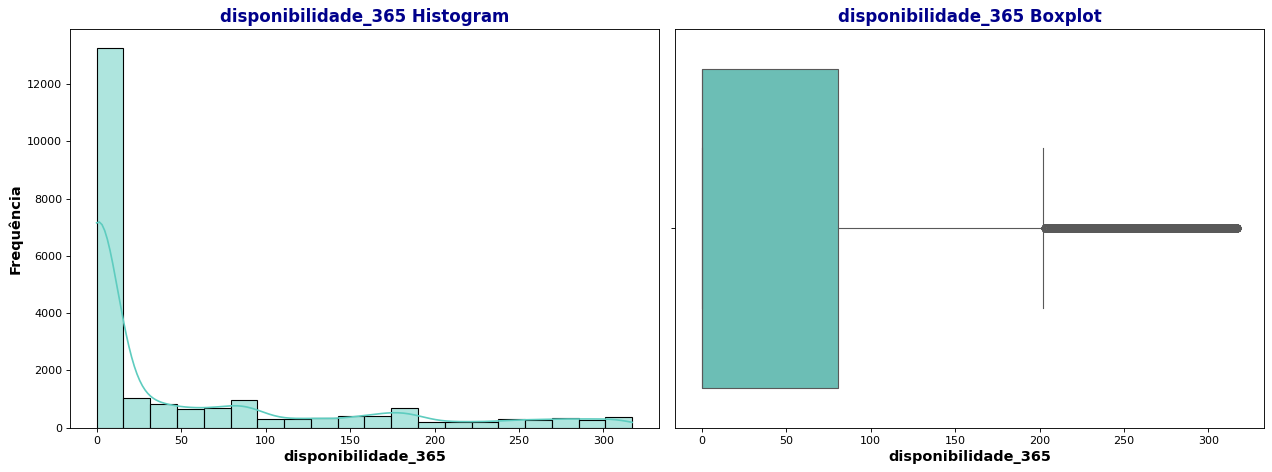

In [14]:
# Gerar gráficos sem outliers
plot_histogram_and_boxplot(df, attributes)

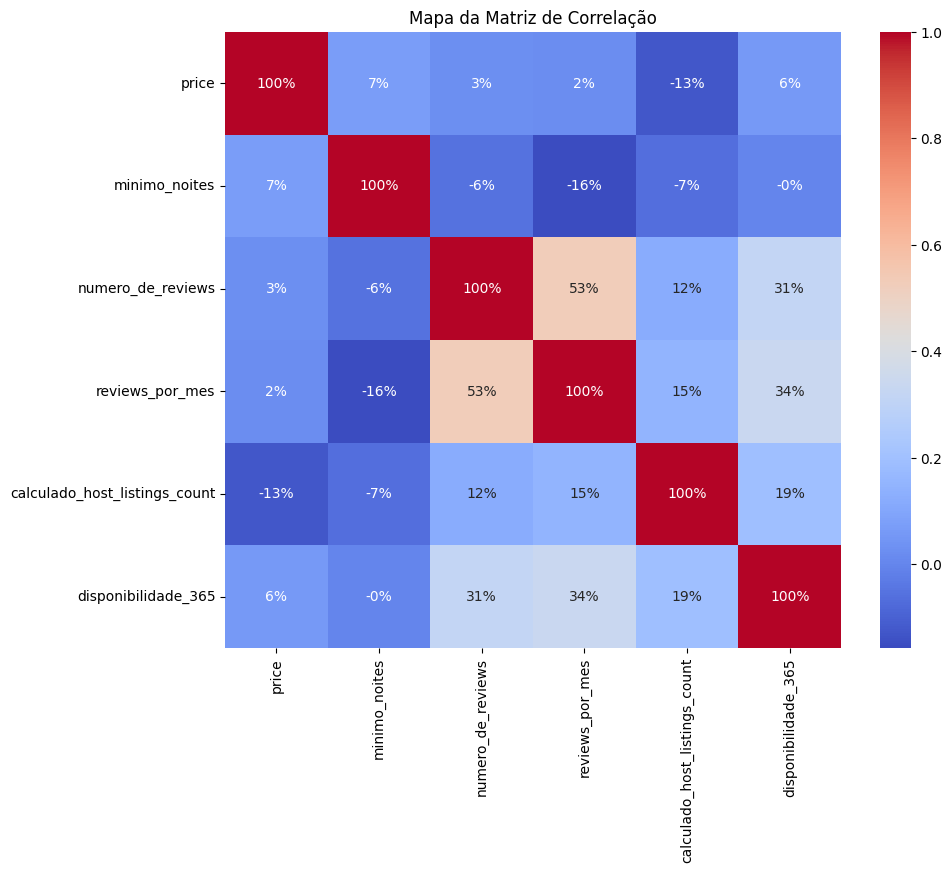

In [15]:
# Relação de correlação entre as variáveis numéricas
num_df = df[['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']]

corr_matrix = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.0%', square=True)
plt.title('Mapa da Matriz de Correlação')
plt.show()

A maioria das correlações é do tipo fraca, mas podemos levatar algumas hipóteses:

1. **Disponibilidade_365** e ambas as variáveis **numero_de_reviews e reviews_por_mes**, possuem uma correlação moderada de 31% e 34%.

  Isso pode sugerir que propriedades com maior disponibilidade têm uma maior probabilidade de serem reservadas, o que, por sua vez, pode resultar em um maior número de avaliações.

2. **minimo_noites** e **reviews_por_mes** possui correlação -16%, relação inversa.

  Um número elevado de mínimo de noites pode estar associado a uma menor rotatividade de hóspedes e, potencialmente, a uma diminuição no número de avaliações por mês devido à limitação na quantidade de hóspedes que podem reservar a propriedade dentro desse período de tempo.

3. **price** e **calculo_host_listing_count** correlação inversa de -13%

  Preços mais elevados podem sugerir propriedades de luxo, o que poderia resultar em uma menor quantidade de listagens por parte do anfitrião, devido à provável escassez de propriedades de luxo disponíveis para anunciar. Por outro lado, é mais provável que um anfitrião tenha propriedades mais populares, com preços mais baixos, resultando em uma maior quantidade de listagens.

4. **disponibilidade_365** e o **calculado_host_listings_count** de 19%

   Propriedades com um maior número de listagens calculadas pelo host podem estar ligeiramente associadas a uma maior disponibilidade ao longo do ano.

5. **numero_de_reviews** e **reviews_por_mes**

   Existe uma correlação positiva de 53% por serem ambas relacionados ao número de reviews.




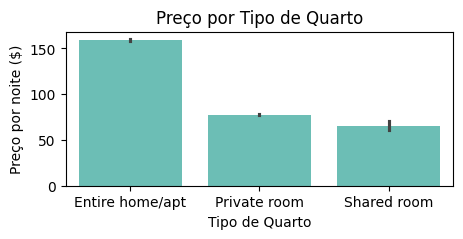

In [16]:
# Podemos observar que o aluguel de apartamentos completos tende a ser mais elevado em comparação com quartos privados e quartos compartilhados.
plt.figure(figsize=(5, 2))
sns.barplot(x="room_type", y="price", data=df, color=aqua)
plt.title('Preço por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço por noite ($)')
plt.show()

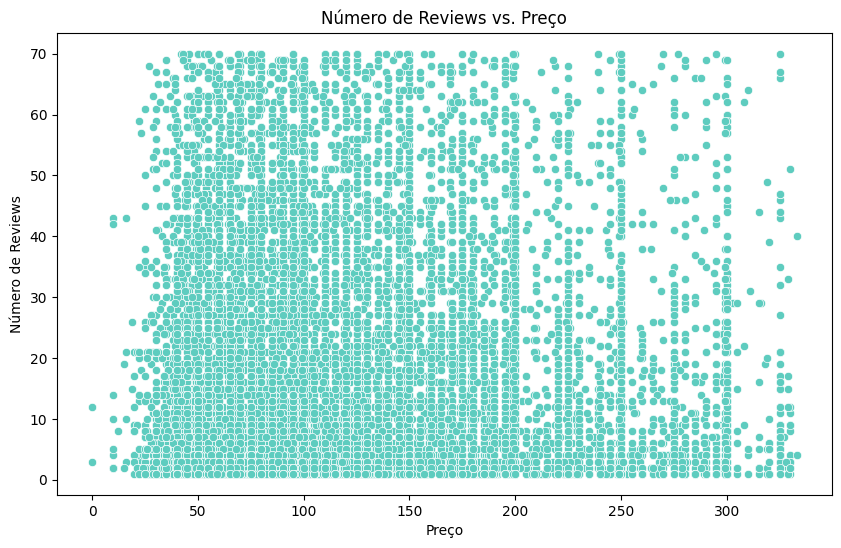

In [17]:
# É possível observar que os imóveis com preços mais altos tendem a estar em uma região no gráfico com menos reviews.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='numero_de_reviews', data=df, color=aqua)
plt.title('Número de Reviews vs. Preço')
plt.xlabel('Preço')
plt.ylabel('Número de Reviews')
plt.show()

Os gráficos a seguir sugerem que existe uma concentração de pontos próxima de 0 na disponibilidade ao longo de 365 dias, o que está associado a menos disponibilidade e, consequentemente, menos reviews. Nas outras regiões do gráfico, observamos uma dispersão mais uniforme dos pontos, indicando uma homogeneidade nos dados em relação ao número de reviews e disponibilidade.

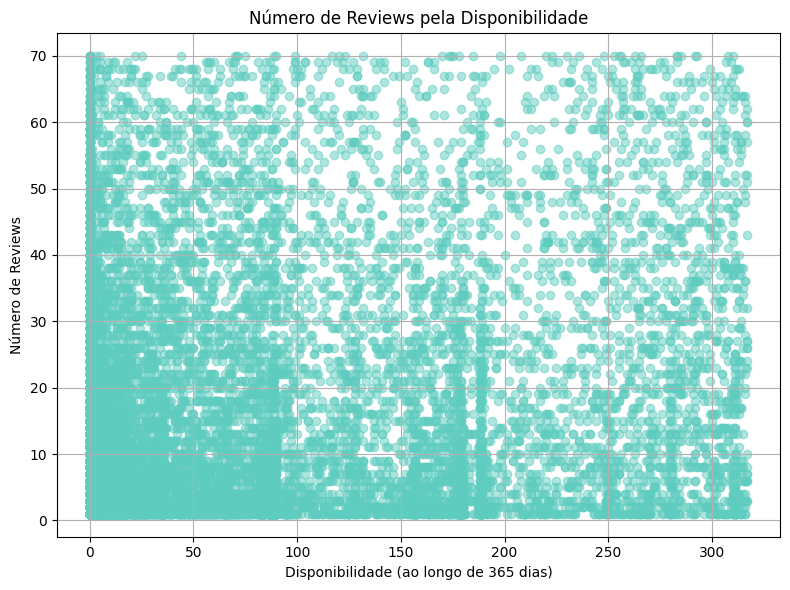

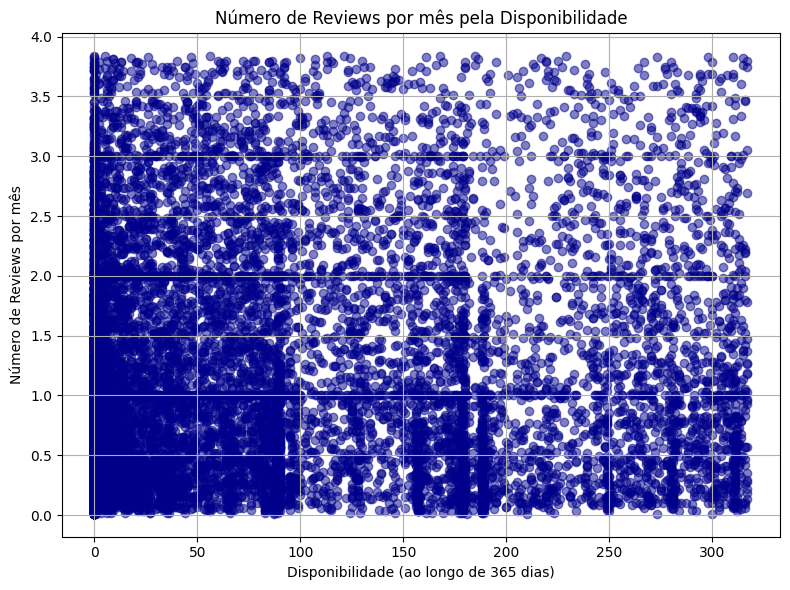

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df['disponibilidade_365'], df['numero_de_reviews'], color=aqua, alpha=0.5)
plt.title('Número de Reviews pela Disponibilidade')
plt.xlabel('Disponibilidade (ao longo de 365 dias)')
plt.ylabel('Número de Reviews')
plt.grid(True)
plt.tight_layout()

plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['disponibilidade_365'], df['reviews_por_mes'], color='darkblue', alpha=0.5)
plt.title('Número de Reviews por mês pela Disponibilidade')
plt.xlabel('Disponibilidade (ao longo de 365 dias)')
plt.ylabel('Número de Reviews por mês')
plt.grid(True)
plt.tight_layout()

plt.show()

### 3.1.2 - Questão 2.A - Melhores regiões

Para maximizar o retorno financeiro do aluguel do imóvel, vamos identificar os bairros que apresentam os maiores valores médios de aluguel. Para simplificar nossa análise, dos 200 bairros iremos analisar os primeiros 20 com maiores média.

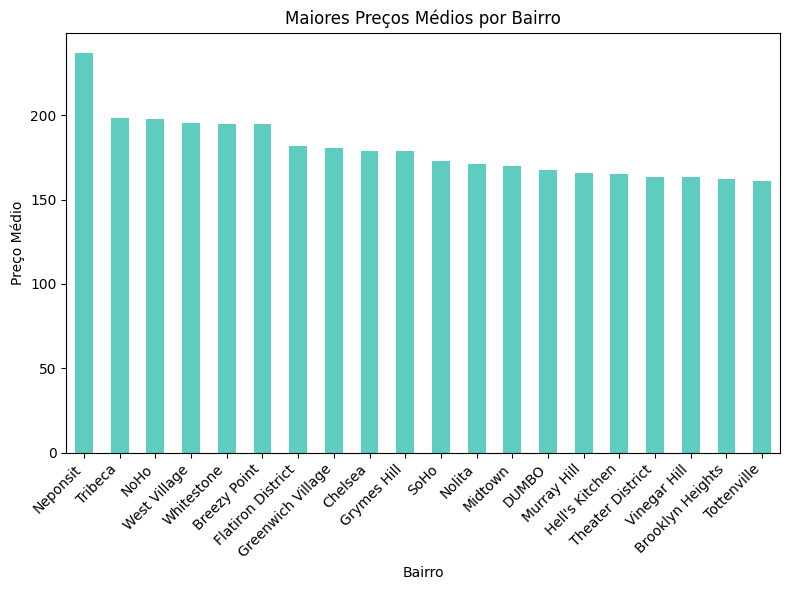

In [19]:

mean_neighborhood_price = df.groupby('bairro')['price'].mean()
mean_neighborhood_price = mean_neighborhood_price.sort_values(ascending=False)
mean_neighborhood_price_top = mean_neighborhood_price.head(20)

plt.figure(figsize=(8, 6))
mean_neighborhood_price_top.plot(kind='bar', color=aqua)
plt.title('Maiores Preços Médios por Bairro')
plt.xlabel('Bairro')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [20]:
mean_neighborhood_price_top

bairro
Neponsit             237.000000
Tribeca              198.244444
NoHo                 197.531250
West Village         195.548813
Whitestone           195.000000
Breezy Point         195.000000
Flatiron District    181.800000
Greenwich Village    180.391304
Chelsea              178.550321
Grymes Hill          178.500000
SoHo                 172.822695
Nolita               170.870229
Midtown              169.820707
DUMBO                167.727273
Murray Hill          165.525000
Hell's Kitchen       165.368816
Theater District     163.380952
Vinegar Hill         163.294118
Brooklyn Heights     162.383721
Tottenville          160.800000
Name: price, dtype: float64

A maioria dos bairros listados acima está localizada na região de Manhattan.
Além disso, podemos observar no gráfico a seguir que a média dos preços das acomodações nos bairros de Manhattan de fato é mais elevada em comparação com outros grupos de bairros.

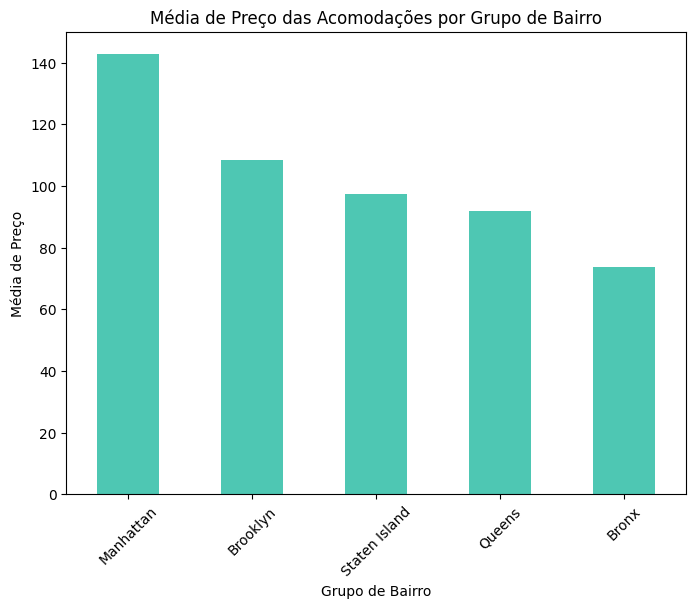

In [21]:
mean_group_neighborhood_price = df.groupby('bairro_group')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
mean_group_neighborhood_price.plot(kind='bar', color='#4ec7b3')
plt.title('Média de Preço das Acomodações por Grupo de Bairro')
plt.xlabel('Grupo de Bairro')
plt.ylabel('Média de Preço')
plt.xticks(rotation=45)
plt.show()


Pesquisando sobre esses bairros, é possível acessar informações que citam que essas áreas oferecem acesso a algumas comodidades urbanas, como restaurantes, lojas, parques e transporte público de alta qualidade, além de vistas panorâmicas, o que aumenta a demanda por moradia e impulsiona os preços dos aluguéis.

Alguns desses bairros possuem nas proximidades galerias de arte, teatros, boutiques de moda, restaurantes sofisticados, como nos bairros **Chelsea, NoHo e Greenwich Village e Tribeca**.

A maioria dos bairros da lista estão localizados na região de Manhattan como **Tribeca, NoHo, West Village, Flatiron District, Greenwich Village, Chelsea,SoHo e Midtown**. São localizados em regiões de centros comerciais e instituições financeiras, o que demanda a busca por hospedagem próxima do trabalho.

**Neponsit, Whitestone, Breezy Point e Vinegar Hill** são famosos por serem áreas residenciais, com ruas arborizadas e casas espaçosas.

Vamos observar a localização desses bairros no mapa

**Mapa para visualizar a localização**

Vamos filtrar o DataFrame para incluir apenas os bairros de mean_neighborhood_price_top.
Na lista, observamos que o mesmo bairro pode ter valores ligeiramente diferentes de latitude e longitude, portanto, selecionamos a primeira ocorrência de cada bairro.
O ponto central será a média das latitudes e longitudes.



In [22]:
df_top_price = df[df['bairro'].isin(mean_neighborhood_price_top.index)]
df_filtered_first_occurrence = df_top_price.groupby('bairro').first()

center_location = (40.728951, -73.952169)

m = folium.Map(location=center_location, zoom_start=10)

for idx, row in df_filtered_first_occurrence.iterrows():
    folium.Marker(location=(row['latitude'], row['longitude'])).add_to(m)



In [23]:
display(HTML(f'<div style="width: 800px; height: 600px">{m._repr_html_()}</div>'))


No mapa, podemos notar que os bairros não estão necessariamente agrupados próximos uns dos outros. No entanto, muitos pontos estão claramente localizados perto de parques e áreas litorâneas, o que pode indicar uma localização que contribui para preços mais elevados.

Há uma concentração significativa na região conhecida como a ilha de Manhattan, que é considerada uma localização central. Esta área oferece uma oferta limitada de espaço, possui um prestígio associado, uma infraestrutura de alta qualidade.

Para avaliar a rotatividade do imóvel, pode ser interessante examinar o número de reviews, pois isso sugere a frequência de ocupação do imóvel.

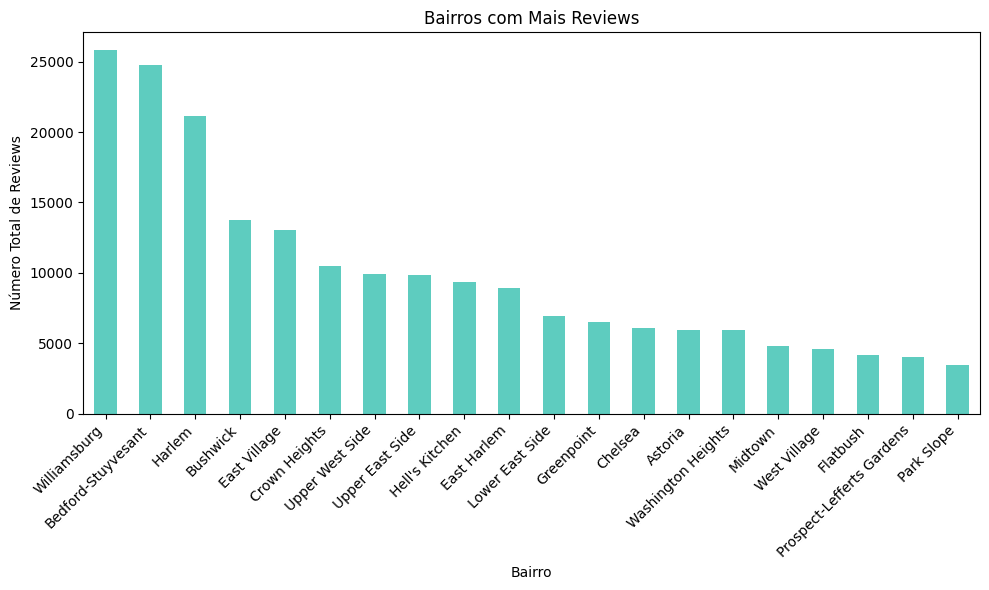

In [24]:
# Maior número de reviews
# Calcular o número total de reviews por bairro
num_reviews_neighborhood = df.groupby('bairro')['numero_de_reviews'].sum()

total_reviews_by_neighborhood = num_reviews_neighborhood.sort_values(ascending=False)

top_neighborhood_reviews = total_reviews_by_neighborhood.head(20)

plt.figure(figsize=(10, 6))
top_neighborhood_reviews.plot(kind='bar', color=aqua)
plt.title('Bairros com Mais Reviews')
plt.xlabel('Bairro')
plt.ylabel('Número Total de Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
top_neighborhood_reviews

bairro
Williamsburg                 25804
Bedford-Stuyvesant           24742
Harlem                       21129
Bushwick                     13786
East Village                 13076
Crown Heights                10501
Upper West Side               9885
Upper East Side               9863
Hell's Kitchen                9355
East Harlem                   8909
Lower East Side               6932
Greenpoint                    6478
Chelsea                       6056
Astoria                       5964
Washington Heights            5920
Midtown                       4816
West Village                  4553
Flatbush                      4188
Prospect-Lefferts Gardens     4008
Park Slope                    3482
Name: numero_de_reviews, dtype: int64

Comparando a lista de bairros com aluguéis mais altos, podemos inferir que uma maior quantidade de reviews pode indicar uma maior rotatividade de hóspedes nesses imóveis. Isso sugere uma demanda consistente e uma popularidade entre os visitantes.

Portanto, os bairros que apresentam tanto um alto número de reviews quanto preços de aluguel elevados são **Chelsea, Midtown, Hell's Kitchene West Village**. Essas áreas indicam que são populares entre os hóspedes, o que pode representar oportunidades interessantes para investimentos imobiliários devido à sua demanda constante.

### 3.1.3 - Questão 2.B - Preço e disponibilidade

A matriz de correlação anterior revelou uma correlação fraca entre **'minimo_noites' e 'price'**, com um coeficiente de correlação de 7%, e entre **'disponibilidade_365' e 'price'**, com um coeficiente de correlação de 6%.
Porém vamos analisar graficamente para verificar se alguma relação pode ser evidenciada.

In [26]:
print("Máximo de noites mínimas:", df['minimo_noites'].max())
print("Máximo de disponibilidade 365:", df['disponibilidade_365'].max())

Máximo de noites mínimas: 10
Máximo de disponibilidade 365: 317


Após remover os valores discrepantes, observamos que o número máximo de mínimo de noites foi ajustado para 10 e a disponibilidade para 317. Agora, vamos explorar se existe alguma relação entre esses limites e os preços das acomodações.

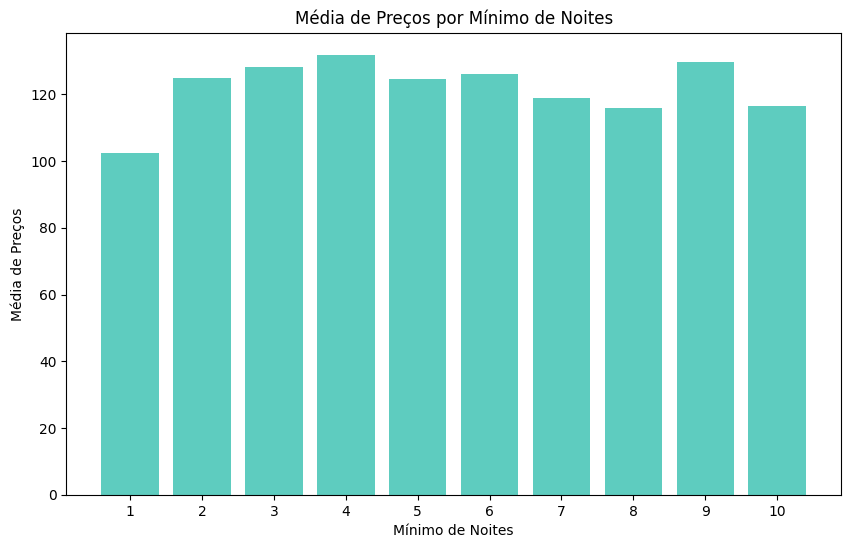

In [27]:
mean_prices = df.groupby('minimo_noites')['price'].mean()

plt.figure(figsize=(10, 6))
plt.bar(mean_prices.index, mean_prices.values, color=aqua)

plt.xlabel('Mínimo de Noites')
plt.ylabel('Média de Preços')
plt.title('Média de Preços por Mínimo de Noites')

plt.xticks(mean_prices.index)

plt.xticks()
plt.show()

Para uma estadia de apenas uma diária, o valor é geralmente menor. É possível que essas acomodações sejam adequadas para pessoas que estejam de passagem para resolver assuntos relacionados a trabalho ou fazer uma breve parada, o que pode resultar em uma opção mais econômica. No entanto, de modo geral, não há uma tendência ou discrepância significativa nos preços devido ao número mínimo de noites



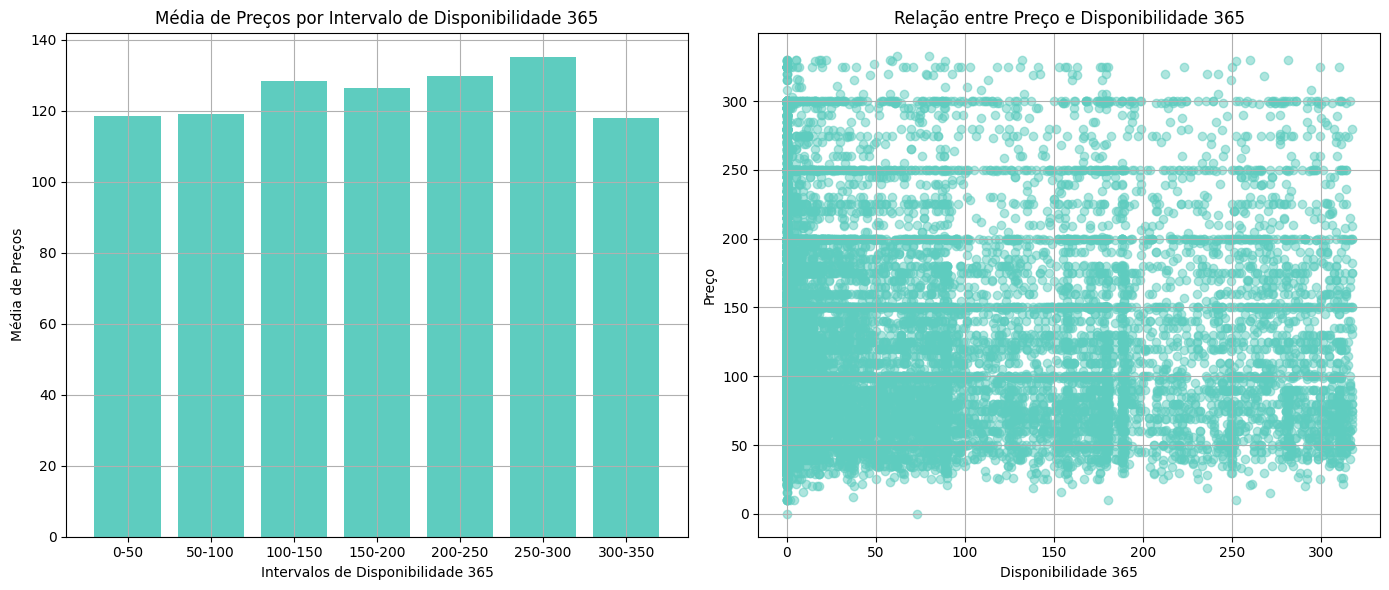

In [28]:
availability_intervals = [(0, 50), (50, 100), (100, 150), (150, 200), (200, 250), (250, 300), (300, 350)]

# Médias
mean_prices = []
for interval in availability_intervals:
    price_interval = df[(df['disponibilidade_365'] >= interval[0]) & (df['disponibilidade_365'] < interval[1])]['price'].mean()
    mean_prices.append(price_interval)

# Gráfico 1: Média de preços por intervalo de disponibilidade
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(availability_intervals)), mean_prices, color=aqua)
plt.xlabel('Intervalos de Disponibilidade 365')
plt.ylabel('Média de Preços')
plt.title('Média de Preços por Intervalo de Disponibilidade 365')
plt.xticks(range(len(availability_intervals)), [f'{interval[0]}-{interval[1]}' for interval in availability_intervals])
plt.grid(True)

# Gráfico 2: Relação entre preço e disponibilidade 365
plt.subplot(1, 2, 2)
plt.scatter(df['disponibilidade_365'], df['price'], color=aqua, alpha=0.5)
plt.xlabel('Disponibilidade 365')
plt.ylabel('Preço')
plt.title('Relação entre Preço e Disponibilidade 365')
plt.grid(True)

plt.tight_layout()
plt.show()

A média de preços por intervalo de disponibilidade, definida em intervalos de 50 a 50, sobe ligeiramente acima de 100 dólares, com uma oscilação média entre aproximadamente 120 e 140 dólares.


Para o gráfico de dispersão, observamos uma concentração na região até 200 dólares e limitada por 100 dias de disponibilidade.

In [29]:
def plot_distribution_by_min_nights(df, bairro_group):
    group_df = df[df['bairro_group'] == bairro_group]

    unique_min_nights = group_df['minimo_noites'].unique()
    unique_min_nights.sort()

    occurrences = []
    avg_prices = []
    for min_night in unique_min_nights:
        filtered_df = group_df[group_df['minimo_noites'] == min_night]
        occurrences.append(filtered_df.shape[0])
        avg_price = filtered_df['price'].mean()
        avg_prices.append(avg_price if not np.isnan(avg_price) else 0)

    x = np.arange(len(unique_min_nights))

    plt.figure(figsize=(10, 6))
    width = 0.35
    bars1 = plt.bar(x - width/2, occurrences, width, label='Bairros', color=aqua)
    plt.ylabel('Número de Bairros')
    plt.title(f'Distribuição de Bairros em {bairro_group} por Número Mínimo de Noites')

    for j, occurrence in enumerate(occurrences):
        plt.text(x[j] - width/2, np.nan_to_num(occurrence, nan=0) + 1, str(occurrence), ha='center', va='bottom')

    bars2 = plt.bar(x + width/2, avg_prices, width, label='Média de Preço', color='#cc725e')

    for j, avg_price in enumerate(avg_prices):
        plt.text(x[j] + width/2, avg_price + 1, f'{avg_price:.2f}' if avg_price != 0 else '0', ha='center', va='bottom')

    plt.xticks(x, unique_min_nights)

    plt.xlabel('Número Mínimo de Noites')
    plt.tight_layout()
    plt.show()

Gráfico para mostra a distribuição dos bairros em cada grupo de bairros em relação ao número mínimo de noites e sua média de preço associada.

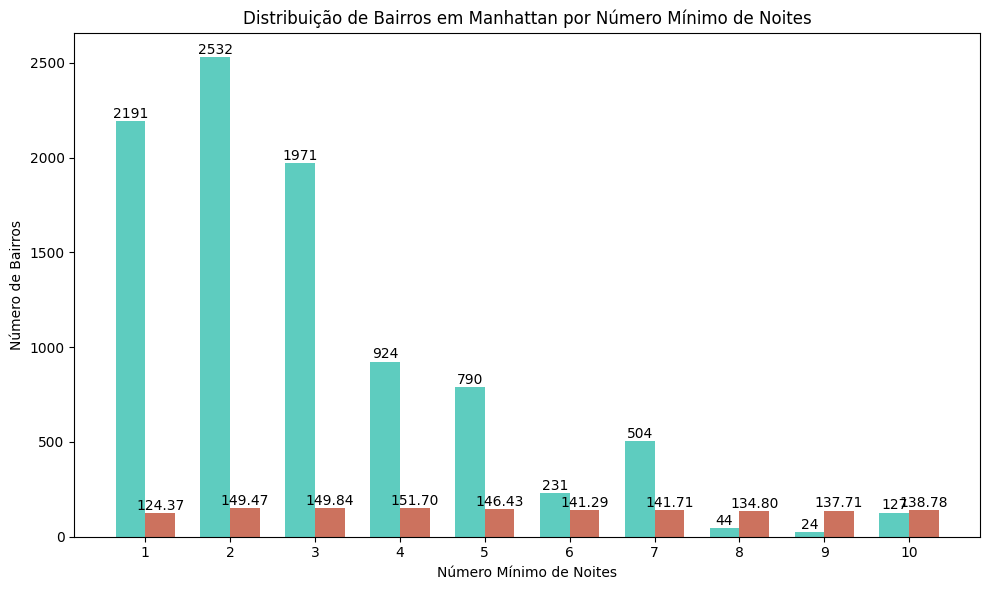

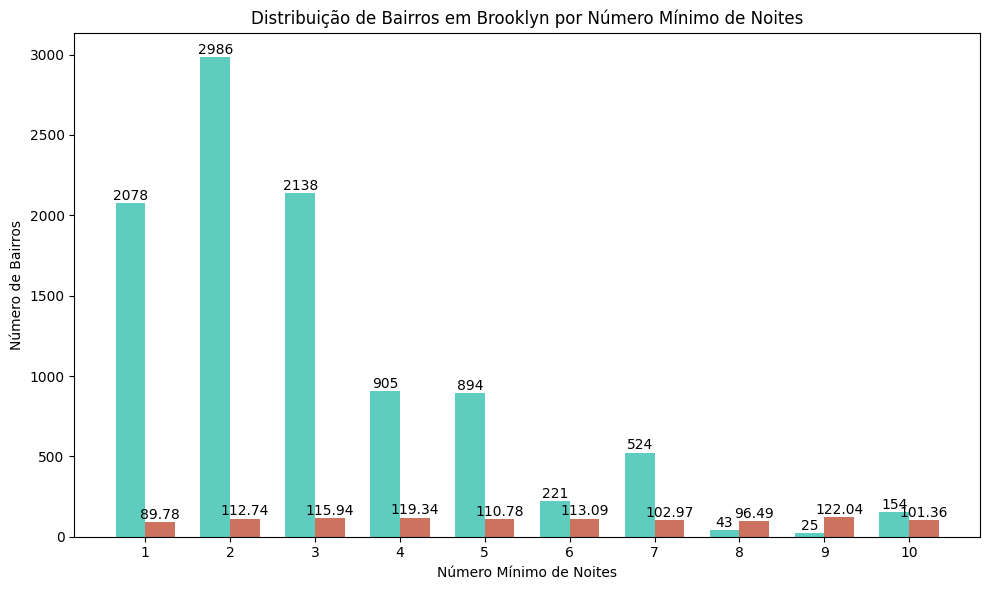

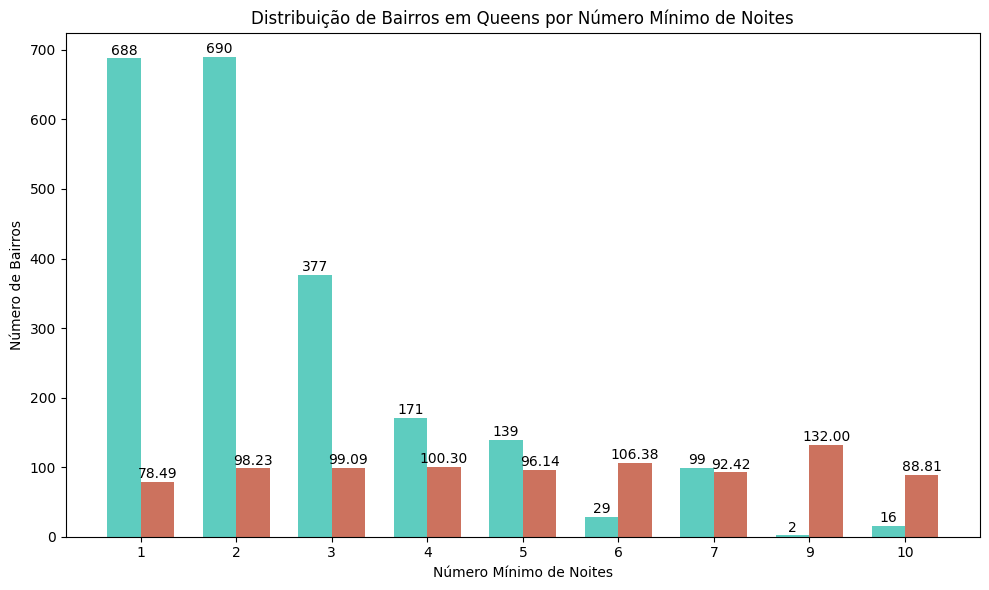

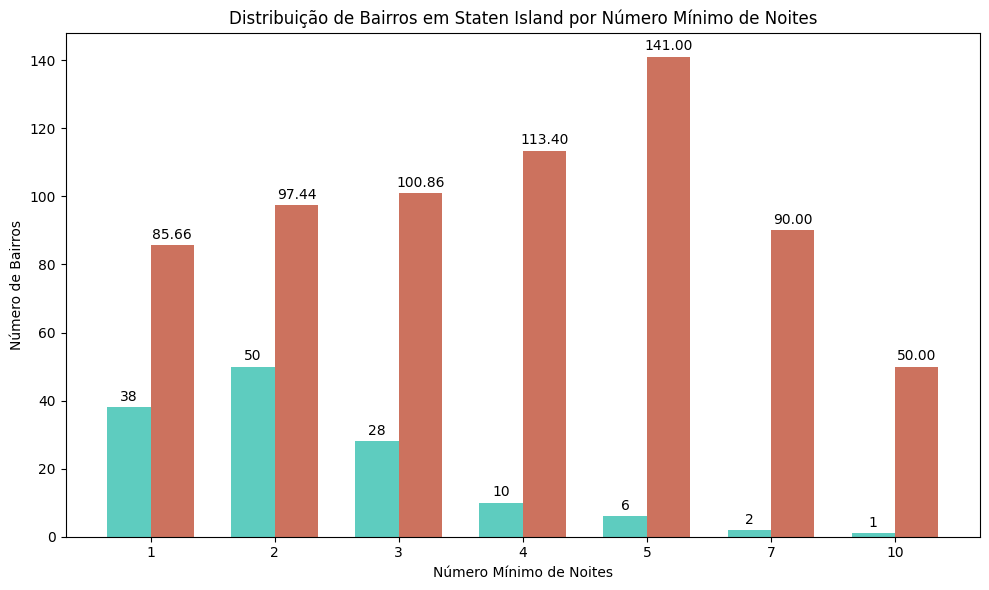

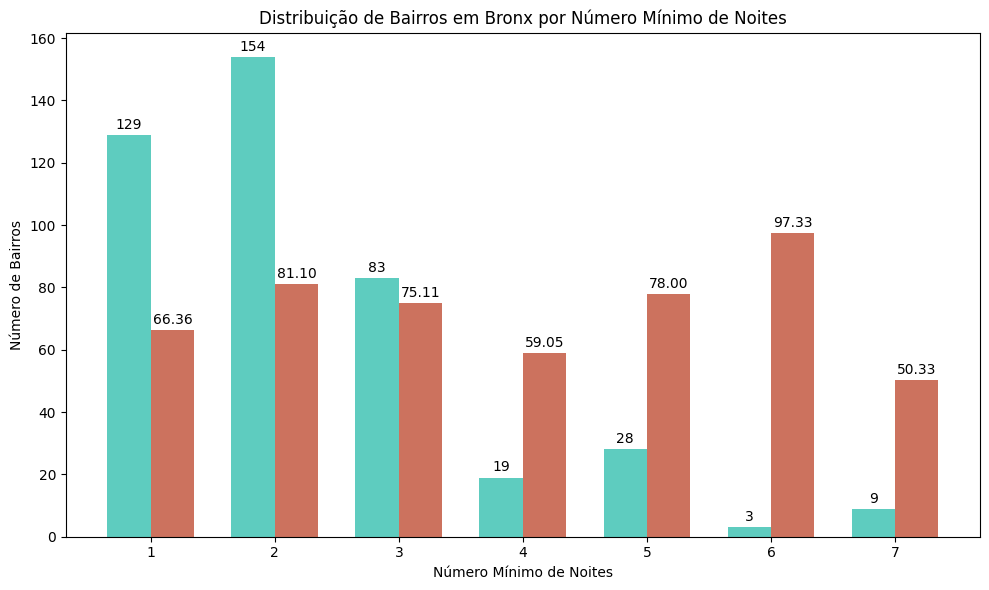

In [30]:
bairro_groups = ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']

for bairro_group in bairro_groups:
    plot_distribution_by_min_nights(df, bairro_group)

Nos bairros de Manhattan e Brooklyn, a média dos preços não exibe variação significativa nem uma tendência clara em relação ao número mínimo de noites.

Já nos bairros de Queens, Staten Island e Bronx, nota-se uma variação um pouco mais acentuada nos preços de acordo com o número mínimo de noites. No entanto, os preços não seguem uma tendência linear comum para esses bairros. Em geral, para estadias de uma única noite ou de 10 noites, ou seja, nos extremos, a média dos preços é mais baixa, enquanto nos números mínimos de noites intermediárias, a média dos preços é ligeiramente mais alta. Este é o comportamento observado.

In [31]:
def plot_distribution_by_min_nights(df, bairro_groups):
    unique_min_nights = df['minimo_noites'].unique()
    unique_min_nights.sort()

    fig, axs = plt.subplots(len(bairro_groups), figsize=(10, 10), sharex=True)
    width = 0.35

    for i, bairro_group in enumerate(bairro_groups):
        group_df = df[df['bairro_group'] == bairro_group]

        occurrences = []
        avg_prices = []
        avg_availability = []

        for min_night in unique_min_nights:
            filtered_df = group_df[group_df['minimo_noites'] == min_night]
            occurrences.append(filtered_df.shape[0])
            avg_price = filtered_df['price'].mean()
            avg_prices.append(avg_price if not np.isnan(avg_price) else 0)
            avg_availability.append(filtered_df['disponibilidade_365'].mean())

        x = np.arange(len(unique_min_nights))

        bars1 = axs[i].bar(x - width/2, occurrences, width, label='Bairros', color=aqua)
        axs[i].set_ylabel('Número de Bairros')
        axs[i].set_title(f'Distribuição de Bairros em {bairro_group} por Número Mínimo de Noites')

        for j, occurrence in enumerate(occurrences):
            axs[i].text(x[j] - width/2, np.nan_to_num(occurrence, nan=0) + 1, str(occurrence), ha='center', va='bottom')

        bars2 = axs[i].bar(x + width/2, avg_prices, width, label='Média de Preço', color='#cc725e')

        for j, avg_price in enumerate(avg_prices):
            axs[i].text(x[j] + width/2, avg_price + 1, f'{avg_price:.2f}' if avg_price != 0 else '0', ha='center', va='bottom')

        axs2 = axs[i].twinx()
        axs2.plot(x, avg_availability, label='Média de Disponibilidade 365', color='darkblue')
        axs2.set_ylabel('Média de Disponibilidade 365')
        axs2.tick_params(axis='y')

    plt.xticks(x, unique_min_nights)

    plt.xlabel('Número Mínimo de Noites')
    plt.tight_layout()
    plt.show()

Vamos tentar observar graficamente se há alguma relação entre os atributos de mínimo de noites, preço e disponibilidade 365.

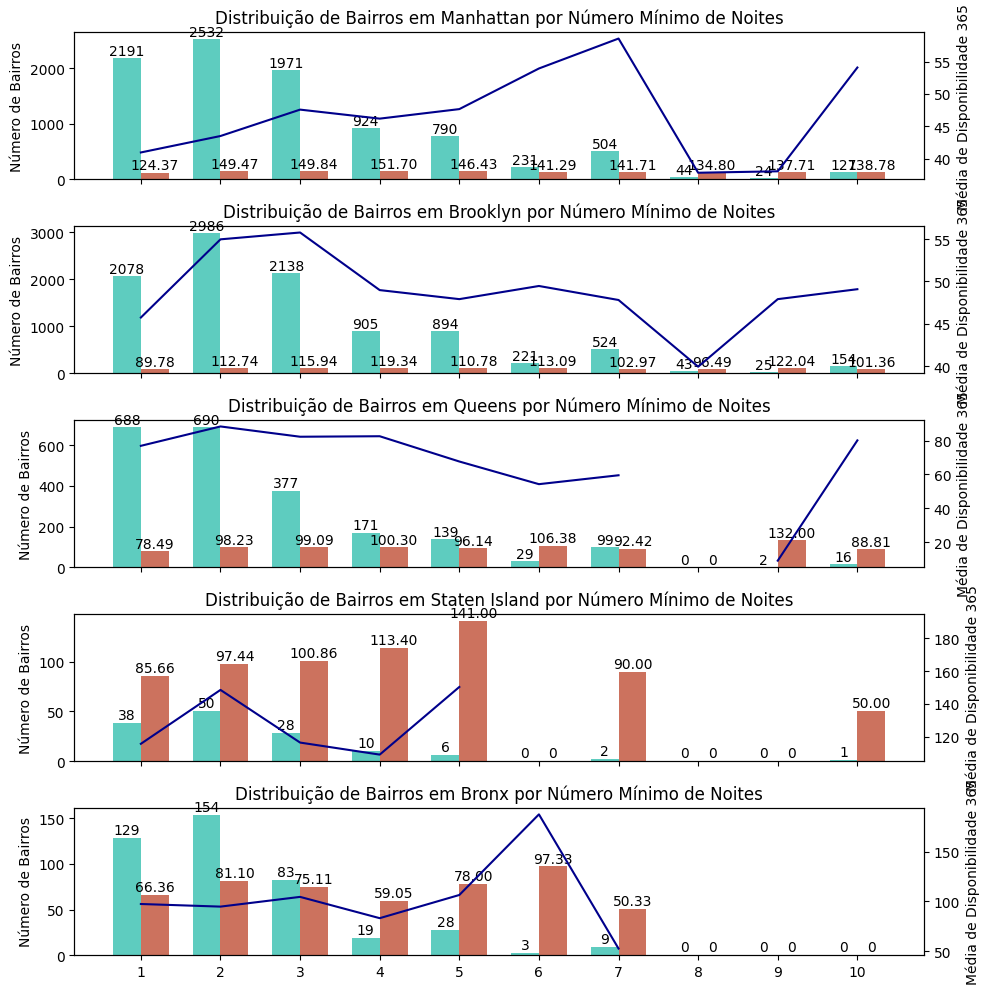

In [32]:
plot_distribution_by_min_nights(df, bairro_groups)

Para o bairro de Bronx e Manhattan, observa-se que a média de disponibilidade anual de 365 dias aumenta até aproximadamente seis diárias.

Nos bairros de Brooklyn e Queens, há uma tendência de crescimento entre uma e duas diárias, mas após duas diárias, a média de disponibilidade anual de 365 dias tende a diminuir.

Quanto ao bairro de Stanley Island, a disponibilidade de dados é irregular, com muitas lacunas para alguns valores mínimos de noites, dificultando uma interpretação clara de sua tendência em relação a qualquer tipo de análise.

Com base nas analises graficas, que apresentou comportamento irregular, e sabendo que a matriz de correlação revelou uma correlação fraca, pode-se inferir que o número mínimo de noites e a disponibilidade 365 não tem uma influência significativa no preço das acomodações.

### 3.1.4 - Questão 2.C - Relação do nome com o preço (NLP)


Para responder 2º pergunta letra C, vamos aplicar alguns princípios de 'natural language processing' para realizar a analise.

In [33]:
!pip install nltk
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import Counter


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
# Vamos analisar apenas o nome e o preço
data = df[['nome', 'price']]
data.head()

,nome,price
3,Entire Apt: Spacious Studio/Loft by central park,80
9,Beautiful 1br on Upper West Side,135
19,Sweet and Spacious Brooklyn Loft,299
24,Sunny Bedroom Across Prospect Park,60
26,Midtown Pied-a-terre,150


In [35]:
# Verificar se há valores ausentes
data.isna().sum()

nome     4
price    0
dtype: int64

In [36]:
data = data.dropna(subset=['nome'])

In [37]:
print("Número de linhas duplicadas:", data.duplicated().sum())

Número de linhas duplicadas: 25


In [38]:
data = data.drop_duplicates()
print("Número de linhas duplicadas:", data.duplicated().sum())


Número de linhas duplicadas: 0


Definimos limites de preços que servirão como parâmetros para identificar preços elevados, armazenando-os em threshold_price. Decidiu-se optar pelo valor médio e pelo limite superior como referência para isso.

In [39]:
# Calculando o limite superior
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = round(Q3 + 1.5 * IQR)

# Calculando a média
media = round(data['price'].mean())

threshold_prices = [media, upper_limit]

print("Limite Superior:", upper_limit)
print(f'Média: {media:.2f}')

Limite Superior: 290
Média: 121.00


In [40]:
#Padronizar nomes e remover símbolos de pontuação

#Transformar todos os caracteres em minúsculos
data['nome'] = data['nome'].str.lower()
#Retirar símbolos de pontuação da coluna text
data["nome"] = data['nome'].str.replace('[^\w\s]','')

C:\Users\manue\AppData\Local\Temp\ipykernel_16964\4129330378.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data["nome"] = data['nome'].str.replace('[^\w\s]','')


In [41]:
data.head()

,nome,price
3,entire apt spacious studioloft by central park,80
9,beautiful 1br on upper west side,135
19,sweet and spacious brooklyn loft,299
24,sunny bedroom across prospect park,60
26,midtown piedaterre,150


Será utilizado a biblioteca NLTK, para remover as STOP WORDS, que possui pouco significado para o objetivo desta consulta.

In [42]:
# A função itera sobre cada palavra no texto, e mantém as palavras que não estão na lista de stopwords.
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
data["nome"] = data.nome.map(remove_stopwords)


In [44]:
data.nome

3        entire apt spacious studioloft central park
9                      beautiful 1br upper west side
19                      sweet spacious brooklyn loft
24                sunny bedroom across prospect park
26                                midtown piedaterre
                            ...                     
48731                 brand new 1 bedroom steps soho
48781          lovely privet bedroom privet restroom
48798                                    seas moment
48804                      1b1b apartment near metro
48851            cozy private room bushwick brooklyn
Name: nome, Length: 22048, dtype: object

In [45]:
#Verificar o número de palavras únicas

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(data.nome)

In [46]:
num_unique_words = len(counter)

print("Quantidade de palavras únicas:", num_unique_words)
print("Quantidade de vezes que cada palavra aparece:")
print(counter)

Quantidade de palavras únicas: 5647
Quantidade de vezes que cada palavra aparece:
Counter({'room': 4496, 'bedroom': 3700, 'apartment': 3583, 'private': 3427, 'cozy': 2590, 'apt': 2248, 'spacious': 2136, 'brooklyn': 2129, 'studio': 1906, '1': 1738, 'sunny': 1581, 'east': 1545, 'williamsburg': 1493, 'park': 1410, 'manhattan': 1397, 'village': 1226, 'beautiful': 1207, '2': 1207, 'heart': 1125, 'large': 1023, 'bright': 961, 'nyc': 936, 'near': 912, 'loft': 875, 'modern': 868, 'home': 859, 'central': 747, 'bushwick': 740, 'location': 734, 'charming': 711, 'side': 706, 'west': 684, 'upper': 658, '1br': 653, 'quiet': 649, 'w': 645, 'luxury': 618, 'harlem': 602, 'new': 588, 'bed': 580, 'one': 578, 'brownstone': 574, 'clean': 557, 'great': 547, 'heights': 525, 'br': 495, 'huge': 474, 'close': 459, 'midtown': 419, 'subway': 391, 'garden': 390, 'duplex': 380, 'prime': 373, 'square': 353, 'prospect': 345, 'view': 341, 'bath': 337, 'lovely': 329, 'big': 326, 'astoria': 322, 'hill': 314, 'slope': 31

In [47]:
counter.most_common(10)

[('room', 4496),
 ('bedroom', 3700),
 ('apartment', 3583),
 ('private', 3427),
 ('cozy', 2590),
 ('apt', 2248),
 ('spacious', 2136),
 ('brooklyn', 2129),
 ('studio', 1906),
 ('1', 1738)]

### Tokenization

Tokenização é o procedimento de segmentar um texto em unidades mais pequenas, conhecidas como tokens, e atribuir um índice a cada palavra.

In [48]:
sentences = data['nome']
price = data['price']

In [49]:
#Vetorizar um trecho de texto transformando cada texto em uma sequência de inteiros
tokenizer = Tokenizer(num_words = num_unique_words)
tokenizer.fit_on_texts(sentences)

# index único para cada palavra
word_index = tokenizer.word_index

print(word_index)

{'room': 1, 'bedroom': 2, 'apartment': 3, 'private': 4, 'cozy': 5, 'apt': 6, 'spacious': 7, 'brooklyn': 8, 'studio': 9, '1': 10, 'sunny': 11, 'east': 12, 'williamsburg': 13, 'park': 14, 'manhattan': 15, 'village': 16, '2': 17, 'beautiful': 18, 'heart': 19, 'large': 20, 'bright': 21, 'nyc': 22, 'near': 23, 'loft': 24, 'modern': 25, 'home': 26, 'central': 27, 'bushwick': 28, 'location': 29, 'charming': 30, 'side': 31, 'west': 32, 'upper': 33, '1br': 34, 'quiet': 35, 'w': 36, 'luxury': 37, 'harlem': 38, 'new': 39, 'bed': 40, 'one': 41, 'brownstone': 42, 'clean': 43, 'great': 44, 'heights': 45, 'br': 46, 'huge': 47, 'close': 48, 'midtown': 49, 'subway': 50, 'garden': 51, 'duplex': 52, 'prime': 53, 'square': 54, 'prospect': 55, 'view': 56, 'bath': 57, 'lovely': 58, 'big': 59, 'astoria': 60, 'hill': 61, 'slope': 62, 'min': 63, 'amazing': 64, 'bedstuy': 65, 'train': 66, 'entire': 67, 'city': 68, 'chelsea': 69, '3': 70, 'space': 71, 'comfortable': 72, 'house': 73, '2br': 74, 'greenpoint': 75, 

In [50]:
#Converter o texto (sentences) para uma sequência de index (sequence)

sequences = tokenizer.texts_to_sequences(sentences)

In [51]:
# Combina as sequências de tokens com os preços correspondentes
def combine_sequences_with_price(sequences, price):
    return pd.DataFrame({'sequences': sequences, 'price': price})

# Agrupa os dados por preço
def group_sequences_by_price(data):
    return data.groupby('price')['sequences'].apply(list)

# Calcula a frequência de cada palavra por grupo de preço. Retorna um dicionário
# onde as chaves são os preços e os valores as frequência de palavras.
def calculate_word_frequencies(grouped_data):
    word_frequencies = {}
    for price, sequences_list in grouped_data.items():
        all_sequences = [sequence for sequences in sequences_list for sequence in sequences]
        word_frequencies[price] = Counter(all_sequences)
    return word_frequencies

# Mostra as palavras mais comuns por grupo de preços acima dos threshold_prices
def most_common_words(word_frequencies, threshold_prices, tokenizer):
    word_index = tokenizer.word_index
    reverse_word_index = {index: word for word, index in word_index.items()}

    for threshold_price in threshold_prices:
        high_price_words = Counter()

        for price, frequencies in word_frequencies.items():
            if price > threshold_price:
                high_price_words += frequencies

        print(f"Palavras mais comuns em grupos de preços acima de {threshold_price}:")
        for index, count in high_price_words.most_common(20):
            word = reverse_word_index.get(index)
            if word is not None:
                print(f"Palavra: {word}, Frequência: {count}")
        print()


In [52]:
data = combine_sequences_with_price(sequences, price)
grouped_data = group_sequences_by_price(data)
word_frequencies = calculate_word_frequencies(grouped_data)

most_common_words(word_frequencies, threshold_prices, tokenizer)

Palavras mais comuns em grupos de preços acima de 121:
Palavra: apartment, Frequência: 1713
Palavra: bedroom, Frequência: 1328
Palavra: apt, Frequência: 1190
Palavra: studio, Frequência: 1033
Palavra: spacious, Frequência: 958
Palavra: 1, Frequência: 896
Palavra: village, Frequência: 861
Palavra: east, Frequência: 850
Palavra: 2, Frequência: 761
Palavra: cozy, Frequência: 740
Palavra: brooklyn, Frequência: 701
Palavra: park, Frequência: 680
Palavra: private, Frequência: 636
Palavra: williamsburg, Frequência: 631
Palavra: heart, Frequência: 581
Palavra: sunny, Frequência: 566
Palavra: manhattan, Frequência: 542
Palavra: beautiful, Frequência: 533
Palavra: modern, Frequência: 493
Palavra: loft, Frequência: 492

Palavras mais comuns em grupos de preços acima de 290:
Palavra: 2, Frequência: 70
Palavra: bedroom, Frequência: 67
Palavra: village, Frequência: 64
Palavra: apt, Frequência: 62
Palavra: apartment, Frequência: 59
Palavra: spacious, Frequência: 58
Palavra: loft, Frequência: 49
Palav

In [53]:
print(f'Foi utilizado a média no valor de ${media} e o limite superior de ${upper_limit}, para determinar valores altos.')


Foi utilizado a média no valor de $121 e o limite superior de $290, para determinar valores altos.


**2.c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?**

Baseado nas palavras mais comuns podemos observar:

* "apartment", "bedroom", "apt", "spacious", "village", "east", "park", "private", "williamsburg" e "brooklyn", sugerem características de acomodação e localizações que são relevantes para a maioria dos tipos de propriedades.

* "studio", "cozy", "heart", "sunny", "manhattan" e "loft" estão presentes nos valores acima de $121, indicam uma variedade de propriedades urbanas e suburbanas em diferentes lugares, mantendo um padrão de qualidade e conforto relativamente elevado.

* "loft", "west", "nyc", "luxury" e "central", estão presentes nos valores acima de $290, sugerem propriedades mais exclusivas e situadas em áreas conhecidas pela sofisticação e comodidade.



## 4. Modelo

### 4.1 - Questão 3 - Modelos para previsão

O tipo de problema que foi resolvido é de regressão, pois estamos tentando prever um valor contínuo (o preço) com base em várias variáveis explicativas.

Para prever o preço a partir dos dados, foram aplicados mais de um modelo de machine learning, incluindo regressão linear, Random Forest e rede neural com 1 e 2 camadas escondidas. O objetivo é encontrar o modelo que melhor se adequasse aos dados disponíveis e que fosse capaz de prever com mais precisão os preços das acomodações.

Após treinar e testar os modelos, a métrica escolhida para avaliar o desempenho foi o Erro Quadrático Médio (MSE). O MSE é uma medida comum de qualidade de ajuste em modelos de regressão, pois penaliza de forma quadrática as diferenças entre os valores previstos e os valores reais, fornecendo uma medida da magnitude média dos erros.

Ao final o modelo Random Forest foi selecionado como o melhor modelo com base no MSE. Isso significa que o Random Forest apresentou o menor erro médio ao prever os preços das propriedades em comparação com os outros modelos testados.

[Referência para os prós e contras do modelo Random Forrest](https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04)

Prós:

- Random Forests são versáteis, podendo ser usadas para classificação e regressão.
- Funcionam bem com dados categóricos e numéricos, sem a necessidade de escalonamento.
- Realizam seleção de características automaticamente e geram árvores de decisão independentes, ótimo para lidar com muitas características.
- Pouco afetadas por outliers devido à técnica de binning.
- Lidam bem com relacionamentos lineares e não lineares.
- Geralmente fornecem alta precisão e equilibram viés e variância.

Contras:

- Difíceis de interpretar completamente, apesar de fornecerem importância de características.
- Podem ser computacionalmente intensivas para grandes conjuntos de dados.
- Agem como uma "caixa preta", com pouco controle sobre seu funcionamento.


In [54]:
dfr = df.copy()
print("Valores faltantes:")
print(dfr.isnull().sum())

Valores faltantes:
id                               0
nome                             4
host_id                          0
host_name                        8
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64


In [55]:
print('Quantidade de preços com valor zero:', (dfr['price'] == 0).sum())

Quantidade de preços com valor zero: 2


In [56]:
# Como há apenas 2 ocorrências, vamos remover as entradas com preço igual a zero
dfr = dfr[dfr['price'] != 0]
print('Quantidade de preços com valor zero:', (dfr['price'] == 0).sum())

Quantidade de preços com valor zero: 0


In [57]:
#Os seguintes atributos servem como um identificador e não deve apresentar relevância para o modelo por isso serão removidos
dfr = dfr.drop(columns=['id', 'nome', 'host_id', 'host_name', 'ultima_review'])

In [58]:
dfr.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22075 entries, 3 to 48851
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bairro_group                   22075 non-null  object 
 1   bairro                         22075 non-null  object 
 2   latitude                       22075 non-null  float64
 3   longitude                      22075 non-null  float64
 4   room_type                      22075 non-null  object 
 5   price                          22075 non-null  int64  
 6   minimo_noites                  22075 non-null  int64  
 7   numero_de_reviews              22075 non-null  int64  
 8   reviews_por_mes                22075 non-null  float64
 9   calculado_host_listings_count  22075 non-null  int64  
 10  disponibilidade_365            22075 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.0+ MB


Para os atributos 'bairro', 'bairro_group' e 'room_type', será aplicada uma transformação para torná-los atributos categóricos. Essa transformação é necessário para adequar esses atributos à aplicação de algoritmos de aprendizado de máquina.

In [59]:
label_encoder = LabelEncoder()

dfr['bairro_group'] = label_encoder.fit_transform(dfr['bairro_group']) + 1
bairro_group_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_) + 1))

dfr['bairro'] = label_encoder.fit_transform(dfr['bairro']) + 1
bairro_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_) + 1))

dfr['room_type'] = label_encoder.fit_transform(dfr['room_type']) + 1
room_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_) + 1))

dfr.head()


,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
3,3,61,40.79851,-73.94399,1,80,10,9,0.10,1,0
9,3,194,40.80316,-73.96545,1,135,5,53,0.43,1,6
19,2,206,40.71842,-73.95718,1,299,3,9,0.07,1,0
24,2,207,40.65599,-73.97519,2,60,1,19,1.37,2,85
26,3,92,40.76715,-73.98533,1,150,10,58,0.49,1,75


In [60]:
print("Mapeamento para 'bairro_group':")
print(bairro_group_mapping)

print("\nMapeamento para 'bairro':")
print(bairro_mapping)

print("\nMapeamento para 'room_type':")
print(room_type_mapping)

Mapeamento para 'bairro_group':
{'Bronx': 1, 'Brooklyn': 2, 'Manhattan': 3, 'Queens': 4, 'Staten Island': 5}

Mapeamento para 'bairro':
{'Allerton': 1, 'Arden Heights': 2, 'Arrochar': 3, 'Arverne': 4, 'Astoria': 5, 'Bath Beach': 6, 'Battery Park City': 7, 'Bay Ridge': 8, 'Bay Terrace': 9, 'Bay Terrace, Staten Island': 10, 'Baychester': 11, 'Bayside': 12, 'Bayswater': 13, 'Bedford-Stuyvesant': 14, 'Belle Harbor': 15, 'Bellerose': 16, 'Belmont': 17, 'Bensonhurst': 18, 'Bergen Beach': 19, 'Boerum Hill': 20, 'Borough Park': 21, 'Breezy Point': 22, 'Briarwood': 23, 'Brighton Beach': 24, 'Bronxdale': 25, 'Brooklyn Heights': 26, 'Brownsville': 27, "Bull's Head": 28, 'Bushwick': 29, 'Cambria Heights': 30, 'Canarsie': 31, 'Carroll Gardens': 32, 'Castle Hill': 33, 'Castleton Corners': 34, 'Chelsea': 35, 'Chinatown': 36, 'City Island': 37, 'Civic Center': 38, 'Claremont Village': 39, 'Clason Point': 40, 'Clifton': 41, 'Clinton Hill': 42, 'Cobble Hill': 43, 'College Point': 44, 'Columbia St': 45, 

In [61]:
dfr.columns

Index(['bairro_group', 'bairro', 'latitude', 'longitude', 'room_type', 'price',
       'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

### 4.2 - Divisão dos dados

In [62]:

# variáveis independente
X = dfr.drop('price', axis=1)
# variável dependente
y = dfr['price']

# Tamanhos para conjunto de testes
test_sizes = [0.2, 0.3]


In [63]:
dfr.columns

Index(['bairro_group', 'bairro', 'latitude', 'longitude', 'room_type', 'price',
       'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

### Metricas de avaliação:

MAPE: Porcentagem de erro em relação aos valores reais. Quanto menor o valor do MAPE, melhor é a precisão do modelo.

MSE: Erro quadrático médio entre os valores observados e os valores previstos pelo modelo. Quanto menor o valor do MSE, melhor é a precisão do modelo.

R2: Coeficiente de determinação, representa o percentual da variância dos dados que é explicado pelo modelo. Quanto mais próximo de 1 o valor de R2, melhor é o modelo em explicar a variabilidade dos dados.

### Será aplicado uma Regressão Linear e Random Forrest para obter valores de referência

### 4.3 - Regressão Linear

In [64]:
def train_test_regression(X, y, test_size=0.2, random_state=7):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    return mse, r2, mape

In [65]:
print('Regressão Linear')
print()
for test_size in test_sizes:
    mse, r2, mape = train_test_regression(X, y, test_size=test_size)
    print(f'Test Size: {test_size}')
    print('MAPE (Mean Absolute Percentage Error):', mape)
    print('MSE (Mean Squared Error):', mse)
    print('R2:', r2)
    print('---------------------------------------------------------------')

Regressão Linear

Test Size: 0.2
MAPE (Mean Absolute Percentage Error): 37.61123665097344
MSE (Mean Squared Error): 2392.496028523956
R2: 0.46008885510065656
---------------------------------------------------------------
Test Size: 0.3
MAPE (Mean Absolute Percentage Error): 36.98481695515557
MSE (Mean Squared Error): 2433.4457808036714
R2: 0.45166276617463974
---------------------------------------------------------------


## 4.5 - Random Forrest

In [66]:
def train_test_random_forest(X, y, test_size=0.3, random_state=7, n_estimators=100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model = RandomForestRegressor(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    return mse, r2, mape

In [67]:
print('Random Forest')
print()
for test_size in test_sizes:
    mse, r2, mape = train_test_random_forest(X, y, test_size=test_size)
    print(f'Test Size: {test_size}')
    print('MAPE (Mean Absolute Percentage Error):', mape)
    print('MSE (Mean Squared Error):', mse)
    print('R2:', r2)
    print('---------------------------------------------------------------')

Random Forest



Test Size: 0.2
MAPE (Mean Absolute Percentage Error): 32.34305351182316
MSE (Mean Squared Error): 2012.5827572819935
R2: 0.545823337746904
---------------------------------------------------------------
Test Size: 0.3
MAPE (Mean Absolute Percentage Error): 32.063270708982536
MSE (Mean Squared Error): 2063.419976823192
R2: 0.5350420333024455
---------------------------------------------------------------


Análise:

Os resultados revelam que o modelo Random Forest obteve menores valores de MAPE e MSE, além de um R2 mais elevado em comparação com a Regressão Linear.

Esses resultados indicam que o modelo Random Forest teve um desempenho geralmente superior ao modelo de Regressão Linear nas métricas de avaliação.

# Redes Neurais

Será aplicado modelos de redes neurais com uma e duas camadas, variando alguns parâmetros para comparar e determinar qual deles apresenta o melhor desempenho na previsão do preço. As variações estarão comentadas no código.

Será utilizado a função de ativação Relu, pois é indicada para casos
de problemas de regressão e previsão de preços devido a sua capacidade de introduzir não linearidades no modelo, permitindo que ele aprenda padrões complexos nos dados. O otimizador será Adam, pois possui bons resultados para problemas de regressão.

Por limitações operacionais, epochs será mantida com valor 20

## 4.6 - Rede neural de 1 camada

In [68]:
X = dfr.drop('price', axis=1)
y = dfr['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [69]:
def train_test_neural_network_1_layer(X, y, hidden_layers=1, neurons=10, activation='relu', test_size=0.2, epochs=20, batch_size=32):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    return mse

In [70]:
configurations = [
    (1, 10, 'relu'),  # 1 camada escondida com 10 neurônios e função de ativação ReLU
    (1, 20, 'relu'),  # 1 camada escondida com 20 neurônios e função de ativação ReLU
    (1, 30, 'relu'),  # 1 camada escondida com 30 neurônios e função de ativação ReLU
    (1, 40, 'relu'),  # 1 camada escondida com 40 neurônios e função de ativação ReLU
    (1, 50, 'relu'),  # 1 camada escondida com 50 neurônios e função de ativação ReLU
]

test_size = 0.2
epochs = 20
batch_size = 32

print('Rede neural (configuração: nº camadas, nº neurônios, função de ativação)')
for config in configurations:
    hidden_layers, neurons, activation = config
    mse = train_test_neural_network_1_layer(X, y, hidden_layers=hidden_layers, neurons=neurons, activation=activation, test_size=test_size, epochs=epochs, batch_size=batch_size)
    print(f'Configuração: {config}')
    print('MSE:', mse)
    print('------------------------------------------------------------------------------------------')


Rede neural (configuração: nº camadas, nº neurônios, função de ativação)
138/138 [==============================] - 0s 2ms/step
Configuração: (1, 10, 'relu')
MSE: 2716.302940544514
------------------------------------------------------------------------------------------
138/138 [==============================] - 0s 1ms/step
Configuração: (1, 20, 'relu')
MSE: 2637.3549586786485
------------------------------------------------------------------------------------------
138/138 [==============================] - 1s 3ms/step
Configuração: (1, 30, 'relu')
MSE: 2632.128238468805
------------------------------------------------------------------------------------------
138/138 [==============================] - 0s 1ms/step
Configuração: (1, 40, 'relu')
MSE: 2584.7626761784245
------------------------------------------------------------------------------------------
138/138 [==============================] - 1s 4ms/step
Configuração: (1, 50, 'relu')
MSE: 2581.049854604372
---------------------

Para as configurações definidas, o MSE resultou em aproximadamente 2500. Nessa execução a com 50 neurônios e função de ativação Relu obteve o menor erro médio quadrático MSE, indicando um desempenho melhor em relação às outras configurações testadas

## 4.7 - Rede neural de 2 camadas

In [71]:
def train_test_neural_network_2_layers(X, y, neurons_layer1, neurons_layer2, activation='relu', test_size=0.2, epochs=20, batch_size=32):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

    model = Sequential()
    model.add(Dense(neurons_layer1, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons_layer2, activation=activation))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    return mse

In [72]:
configurations_2_layers = [
    (20, 10, 'relu'),  # 2 camadas escondidas com 20 e 10 neurônios e função de ativação ReLU
    (50, 40, 'relu'),  # 2 camadas escondidas com 50 e 40 neurônios e função de ativação ReLU
    (60, 30, 'relu'),  # 2 camadas escondidas com 60 e 30 neurônios e função de ativação ReLU
]

test_size = 0.2
epochs = 20
batch_size = 32

print('Rede neural (configuração: nº camadas escondidas, nº neurônios, função de ativação)')
for config in configurations_2_layers:
    neurons_layer1, neurons_layer2, activation = config
    mse = train_test_neural_network_2_layers(X, y, neurons_layer1=neurons_layer1, neurons_layer2=neurons_layer2, activation=activation, test_size=test_size, epochs=epochs, batch_size=batch_size)
    print(f'Configuração: {config}')
    print('MSE:', mse)
    print('------------------------------------------------------------------------------------------')

Rede neural (configuração: nº camadas escondidas, nº neurônios, função de ativação)


138/138 [==============================] - 0s 2ms/step
Configuração: (20, 10, 'relu')
MSE: 2647.3330344359633
------------------------------------------------------------------------------------------
138/138 [==============================] - 0s 2ms/step
Configuração: (50, 40, 'relu')
MSE: 2524.241465978406
------------------------------------------------------------------------------------------
138/138 [==============================] - 0s 1ms/step
Configuração: (60, 30, 'relu')
MSE: 2595.0438555769447
------------------------------------------------------------------------------------------


Para as configurações definidas a melhor foi a com 50 camadas escondidas, 40 neurônios e função de ativação Relu, pois possui o menor erro médio quadrático MSE entre as opções fornecidas.

Entre os modelos com 1 ou 2 camadas escondidas, o menor MSE observado, correspondente à configuração de 2 camadas escondidas utilizando a função de ativação Relu.

## 5 - Previsão

### 5.1 - Questão 4

Dados fornecidos:

```
{
  'id': 2595,
  'nome': 'Skylit Midtown Castle',
  'host_id': 2845,
  'host_name': 'Jennifer',
  'bairro_group': 'Manhattan',
  'bairro': 'Midtown',
  'latitude': 40.75362,
  'longitude': -73.98377,
  'room_type': 'Entire home/apt',
  'price': 225,
  'minimo_noites': 1,
  'numero_de_reviews': 45,
  'ultima_review': '2019-05-21',
  'reviews_por_mes': 0.38,
  'calculado_host_listings_count': 2,
  'disponibilidade_365': 355
 }

```





Será necessário realizar a conversão dos valores de texto para os números correspondentes às categorias numéricas dos atributos bairro, bairro_grupo e room_type.

In [73]:
print("Número associado a 'Midtown':", bairro_mapping['Midtown'])
print("Número associado a 'Mannhattan':", bairro_group_mapping['Manhattan'])
print("Número associado a 'Entire home/apt':", room_type_mapping['Entire home/apt'])

Número associado a 'Midtown': 124
Número associado a 'Mannhattan': 3
Número associado a 'Entire home/apt': 1


Após adaptar os dados para o nosso modelo:

```
{
  'id': 2595,
  'nome': 'Skylit Midtown Castle',
  'host_id': 2845,
  'host_name': 'Jennifer',
  'bairro_group': 3,
  'bairro': 124,
  'latitude': 40.75362,
  'longitude': -73.98377,
  'room_type': 1,
  'price': 225,
  'minimo_noites': 1,
  'numero_de_reviews': 45,
  'ultima_review': '2019-05-21',
  'reviews_por_mes': 0.38,
  'calculado_host_listings_count': 2,
  'disponibilidade_365': 355
 }
```




Dos modelos o que obteve menor valor do MSE foi o Random Forrest e por isso será utilizado na previsão. 
Vamos reproduzir o modelo para salvar no formato pkl

In [74]:
def train_test_random_forest(X, y, test_size=0.2, random_state=7, n_estimators=100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    modelRF = RandomForestRegressor(n_estimators=n_estimators)

    modelRF.fit(X_train, y_train)

    joblib.dump(modelRF, 'final_model.pkl')

    return modelRF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
model = train_test_random_forest(X_train, y_train)


In [75]:
model = joblib.load('final_model.pkl')

# Dados para prever o preço
new_data = {
    'bairro_group': 3,
    'bairro': 124,
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 1,
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

new_df = pd.DataFrame(new_data, index=[0])

predicted_price = model.predict(new_df)

print("Preço Previsto:", predicted_price)



Preço Previsto: [205.63]
